<a href="https://colab.research.google.com/github/munni-annapareddy123/Climate-Trend-Analysis/blob/main/Climate_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()  # Choose GlobalTemperature.zip


Saving GlobalTemperature.zip to GlobalTemperature.zip


In [3]:
import zipfile

with zipfile.ZipFile('GlobalTemperature.zip', 'r') as zip_ref:
    zip_ref.extractall('./')  # Extracts everything in Colab's current folder

!ls  # Check extracted contents


GlobalTemperature  GlobalTemperature.zip  sample_data


In [4]:
!ls GlobalTemperature/


GlobalLandTemperaturesByCity.csv       GlobalLandTemperaturesByState.csv
GlobalLandTemperaturesByCountry.csv    GlobalTemperatures.csv
GlobalLandTemperaturesByMajorCity.csv


In [5]:
import pandas as pd

# Load the CSV
df = pd.read_csv('GlobalTemperature/GlobalTemperatures.csv')

# Display first 5 rows
df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Basic info about columns and types
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


,0
dt,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12
LandMaxTemperature,1200
LandMaxTemperatureUncertainty,1200
LandMinTemperature,1200
LandMinTemperatureUncertainty,1200
LandAndOceanAverageTemperature,1200
LandAndOceanAverageTemperatureUncertainty,1200


In [ ]:
!git --version


git version 2.34.1


In [ ]:
!git clone https://github.com/munni-annapareddy123/Climate-Trend-Analysis.git


Cloning into 'Climate-Trend-Analysis'...


In [ ]:
%cd Climate-Trend-Analysis


/content/Climate-Trend-Analysis


In [ ]:
!git config --global user.email "annapareddylikitha2006@gmail.com"


In [ ]:
!git config --global user.name "Likhitha Reddy"

In [ ]:
!cp "/content/Climate Trend Analysis.ipynb" .


cp: cannot stat '/content/Climate Trend Analysis.ipynb': No such file or directory


In [ ]:
!ls /content


Climate-Trend-Analysis	sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving GlobalTemperature.zip to GlobalTemperature.zip


In [ ]:
!ls /content


Climate-Trend-Analysis	sample_data


In [7]:
# 3) Clean column names & drop duplicates

# normalize column names to simple snake_case
df.columns = (df.columns
               .str.strip()
               .str.lower()
               .str.replace(r'\s+', '_', regex=True)
               .str.replace(r'[^0-9a-z_]', '', regex=True))

print("Cleaned columns (first 30):", df.columns.tolist()[:30])

# drop exact duplicates
before = len(df)
df = df.drop_duplicates()
print("Dropped duplicates:", before - len(df))


Cleaned columns (first 30): ['dt', 'landaveragetemperature', 'landaveragetemperatureuncertainty', 'landmaxtemperature', 'landmaxtemperatureuncertainty', 'landmintemperature', 'landmintemperatureuncertainty', 'landandoceanaveragetemperature', 'landandoceanaveragetemperatureuncertainty']
Dropped duplicates: 0


In [8]:
# 4) Detect & parse date columns

# find columns containing 'date'
date_cols = [c for c in df.columns if 'date' in c]
print("Date-like columns found:", date_cols)

# parse them to datetime (coerce errors to NaT)
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

# pick a primary date column (commonly declarationdate or incidentbegindate)
primary_date = None
for cand in ['declarationdate','incidentbegindate','incidentenddate','begin_date','end_date']:
    if cand in df.columns:
        primary_date = cand
        break

print("Primary date chosen:", primary_date)

# create new time-based features
if primary_date:
    df['year'] = df[primary_date].dt.year
    df['month'] = df[primary_date].dt.month
    df['weekday'] = df[primary_date].dt.day_name()
    display(df[[primary_date,'year','month','weekday']].head())


Date-like columns found: []
Primary date chosen: None


In [9]:
# Inspect first 40 column names
df.columns[:40].tolist()


['dt',
 'landaveragetemperature',
 'landaveragetemperatureuncertainty',
 'landmaxtemperature',
 'landmaxtemperatureuncertainty',
 'landmintemperature',
 'landmintemperatureuncertainty',
 'landandoceanaveragetemperature',
 'landandoceanaveragetemperatureuncertainty']

In [10]:
# 4) Parse the 'dt' column as datetime and extract time features

df['dt'] = pd.to_datetime(df['dt'], errors='coerce')

# Create new time-based features
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['weekday'] = df['dt'].dt.day_name()

# Show a preview
df[['dt', 'year', 'month', 'weekday']].head()


,dt,year,month,weekday
0,1750-01-01,1750,1,Thursday
1,1750-02-01,1750,2,Sunday
2,1750-03-01,1750,3,Sunday
3,1750-04-01,1750,4,Wednesday
4,1750-05-01,1750,5,Friday


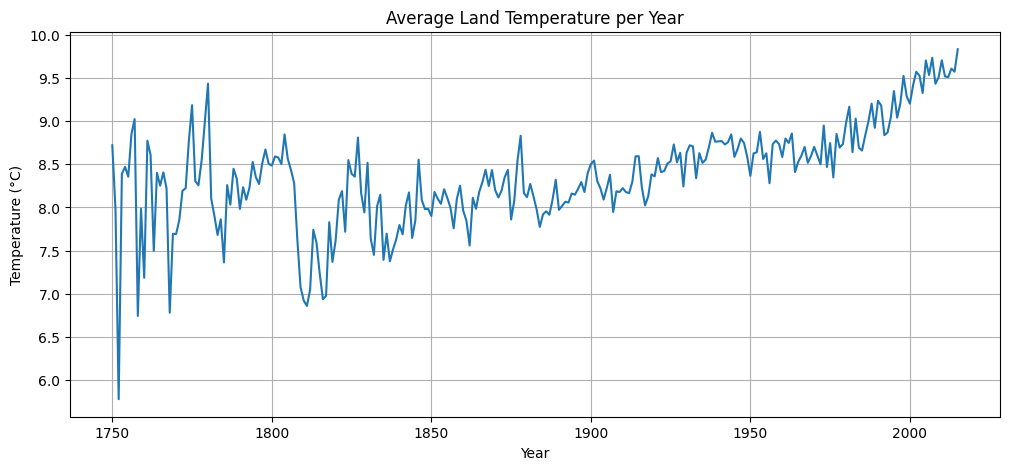

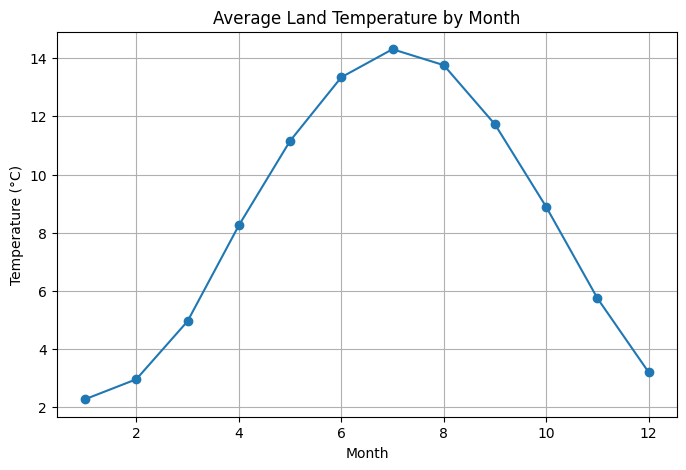

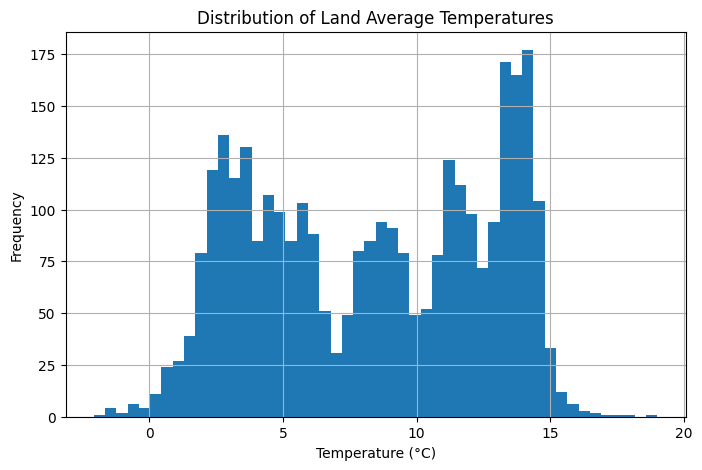

In [11]:
import matplotlib.pyplot as plt

# 1) Average temperature per year
yearly_temp = df.groupby('year')['landaveragetemperature'].mean()

plt.figure(figsize=(12,5))
yearly_temp.plot()
plt.title("Average Land Temperature per Year")
plt.ylabel("Temperature (°C)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# 2) Average temperature per month (across all years)
monthly_temp = df.groupby('month')['landaveragetemperature'].mean()

plt.figure(figsize=(8,5))
monthly_temp.plot(marker='o')
plt.title("Average Land Temperature by Month")
plt.ylabel("Temperature (°C)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

# 3) Distribution of land temperatures
plt.figure(figsize=(8,5))
df['landaveragetemperature'].hist(bins=50)
plt.title("Distribution of Land Average Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


In [12]:
# 6) Data Transformation / Feature Engineering

# 1) Rolling averages to smooth short-term noise
df['temp_5yr_avg'] = df['landaveragetemperature'].rolling(window=60, min_periods=1).mean()  # 5 years if monthly data
df['temp_10yr_avg'] = df['landaveragetemperature'].rolling(window=120, min_periods=1).mean()

# 2) Temperature anomaly (difference from long-term mean)
long_term_mean = df['landaveragetemperature'].mean()
df['temp_anomaly'] = df['landaveragetemperature'] - long_term_mean

# 3) Seasonal (monthly) averages
monthly_means = df.groupby('month')['landaveragetemperature'].transform('mean')
df['seasonal_deviation'] = df['landaveragetemperature'] - monthly_means

# 4) Flag for pre/post industrial revolution (≈1850)
df['pre_industrial'] = (df['year'] < 1850).astype(int)

# Preview new features
df[['dt','landaveragetemperature','temp_5yr_avg','temp_10yr_avg','temp_anomaly','seasonal_deviation','pre_industrial']].head(15)


,dt,landaveragetemperature,temp_5yr_avg,temp_10yr_avg,temp_anomaly,seasonal_deviation,pre_industrial
0,1750-01-01,3.034,3.034000,3.034000,-5.340731,0.758789,1
1,1750-02-01,3.083,3.058500,3.058500,-5.291731,0.121479,1
2,1750-03-01,5.626,3.914333,3.914333,-2.748731,0.669128,1
3,1750-04-01,8.490,5.058250,5.058250,0.115269,0.241312,1
4,1750-05-01,11.573,6.361200,6.361200,3.198269,0.419947,1
5,1750-06-01,12.937,7.457167,7.457167,4.562269,-0.406415,1
6,1750-07-01,15.868,8.658714,8.658714,7.493269,1.560216,1
7,1750-08-01,14.750,9.420125,9.420125,6.375269,0.989936,1
8,1750-09-01,11.413,9.641556,9.641556,3.038269,-0.310170,1
9,1750-10-01,6.367,9.314100,9.314100,-2.007731,-2.517943,1


In [14]:
import numpy as np


In [15]:
# 7) Handle Missing Values

# 1) Numeric columns → fill with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for c in num_cols:
    if df[c].isna().any():
        median_val = df[c].median()
        df[c] = df[c].fillna(median_val)
        print(f"Filled NaN in {c} with median {median_val:.2f}")

# 2) Categorical columns (if any) → fill with 'unknown'
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna('unknown')
        print(f"Filled NaN in {c} with 'unknown'")

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Filled NaN in landaveragetemperature with median 8.61
Filled NaN in landaveragetemperatureuncertainty with median 0.39
Filled NaN in landmaxtemperature with median 14.76
Filled NaN in landmaxtemperatureuncertainty with median 0.25
Filled NaN in landmintemperature with median 2.95
Filled NaN in landmintemperatureuncertainty with median 0.28
Filled NaN in landandoceanaveragetemperature with median 15.25
Filled NaN in landandoceanaveragetemperatureuncertainty with median 0.12
Filled NaN in temp_anomaly with median 0.24
Filled NaN in seasonal_deviation with median 0.03

Missing values after imputation:
dt                                           0
landaveragetemperature                       0
landaveragetemperatureuncertainty            0
landmaxtemperature                           0
landmaxtemperatureuncertainty                0
landmintemperature                           0
landmintemperatureuncertainty                0
landandoceanaveragetemperature               0
landandoceanaverag

In [16]:
# 8) Encode categorical variables

# One-hot encode 'weekday'
df_encoded = pd.get_dummies(df, columns=['weekday'], drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

# Preview encoded columns
df_encoded.head()


Shape before encoding: (3192, 17)
Shape after encoding: (3192, 22)


,dt,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty,year,...,temp_10yr_avg,temp_anomaly,seasonal_deviation,pre_industrial,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1750-01-01,3.034,3.574,14.76,0.252,2.9495,0.279,15.251,0.122,1750,...,3.034000,-5.340731,0.758789,1,False,False,False,True,False,False
1,1750-02-01,3.083,3.702,14.76,0.252,2.9495,0.279,15.251,0.122,1750,...,3.058500,-5.291731,0.121479,1,False,False,True,False,False,False
2,1750-03-01,5.626,3.076,14.76,0.252,2.9495,0.279,15.251,0.122,1750,...,3.914333,-2.748731,0.669128,1,False,False,True,False,False,False
3,1750-04-01,8.490,2.451,14.76,0.252,2.9495,0.279,15.251,0.122,1750,...,5.058250,0.115269,0.241312,1,False,False,False,False,False,True
4,1750-05-01,11.573,2.072,14.76,0.252,2.9495,0.279,15.251,0.122,1750,...,6.361200,3.198269,0.419947,1,False,False,False,False,False,False


In [17]:
# 9) Feature Selection

from sklearn.feature_selection import VarianceThreshold

# ---- 1) Low variance filter ----
# Keep only features with variance above threshold (0.01 here)
selector = VarianceThreshold(threshold=0.01)
num_data = df_encoded.select_dtypes(include=[np.number])

reduced_data = selector.fit_transform(num_data)
reduced_cols = num_data.columns[selector.get_support()]

df_reduced = pd.DataFrame(reduced_data, columns=reduced_cols)

print("Original numeric features:", num_data.shape[1])
print("After variance filter:", df_reduced.shape[1])

# ---- 2) Correlation filter ----
corr_matrix = df_reduced.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_selected = df_reduced.drop(columns=to_drop)

print("After correlation filter:", df_selected.shape[1])

# Final feature set
df_selected.head()


Original numeric features: 15
After variance filter: 14
After correlation filter: 10


,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperatureuncertainty,year,month,temp_5yr_avg,seasonal_deviation,pre_industrial
0,3.034,3.574,14.76,0.252,0.279,1750.0,1.0,3.034000,0.758789,1.0
1,3.083,3.702,14.76,0.252,0.279,1750.0,2.0,3.058500,0.121479,1.0
2,5.626,3.076,14.76,0.252,0.279,1750.0,3.0,3.914333,0.669128,1.0
3,8.490,2.451,14.76,0.252,0.279,1750.0,4.0,5.058250,0.241312,1.0
4,11.573,2.072,14.76,0.252,0.279,1750.0,5.0,6.361200,0.419947,1.0


In [18]:
# Save the cleaned & selected features
df_selected.to_csv("GlobalTemperature_processed.csv", index=False)
print("✅ Processed dataset saved as 'GlobalTemperature_processed.csv'")



✅ Processed dataset saved as 'GlobalTemperature_processed.csv'


In [19]:
!git clone https://github.com/munni-annapareddy123/Climate-Trend-Analysis.git

Cloning into 'Climate-Trend-Analysis'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
Receiving objects: 100% (6/6), 11.04 KiB | 11.04 MiB/s, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)


In [20]:
!git config --global user.name "Likhitha Reddy"

In [21]:
!cp "/content/Climate Trend Analysis.ipynb" .

cp: cannot stat '/content/Climate Trend Analysis.ipynb': No such file or directory


In [22]:
!ls /content

Climate-Trend-Analysis	GlobalTemperature_processed.csv  sample_data
GlobalTemperature	GlobalTemperature.zip


In [23]:
from google.colab import files
uploaded = files.upload()

Saving GlobalTemperature.zip to GlobalTemperature (1).zip


In [24]:
!ls /content

 Climate-Trend-Analysis       GlobalTemperature_processed.csv
 GlobalTemperature	      GlobalTemperature.zip
'GlobalTemperature (1).zip'   sample_data
